In [ ]:
import torch
import torchvision.datasets as dset
import torchvision.models as models
import torchvision.transforms as trans
import torch.nn.functional as F
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import pickle
import random

IMAGENET_TRANSFORM = trans.Compose([trans.ToTensor()])

In [ ]:
testset = dset.ImageFolder('/content/drive/MyDrive/SMAI_proj/Imagenet16v2/val', IMAGENET_TRANSFORM)

In [ ]:
idx = pickle.load(open('idx','rb'))

In [ ]:
mapping = pickle.load(open('mapping','rb'))

In [ ]:
class Simba:
  def __init__(self, model_name, epsilon = 0.3):
    self.model = getattr(models, model_name)(pretrained=True)
    self.epsilon = epsilon
    self.model.eval()
  
  def getAttackIteration(self,img, itr = 10000): # max iteration: 12288
    data,_ = img
    res = self.model(data.unsqueeze(0))
    res = torch.squeeze(res)
    res = res[mapping]
    # print(res.shape)
    _,sorted_idx = torch.sort(res,descending=True)
    actual_class = sorted_idx[0]
    target_class = sorted_idx[4]
    last_prob = F.softmax(res,dim=-1)[target_class]
    length = torch.numel(data)
    rand = torch.randperm(length)
    image = data
    for i in tqdm(range(itr)):
      noise = torch.zeros(length)
      noise[rand[i]] += self.epsilon 
      # check addition
      new_image = torch.flatten(image) + noise
      new_image = new_image.reshape(data.shape)
      res = self.model(new_image.unsqueeze(0))
      res = torch.squeeze(res)
      res = res[mapping]
      new_class = torch.argmax(res)
      if new_class == target_class:
        image = new_image
        break
      new_prob = F.softmax(res,dim=-1)[target_class]
      if new_prob < last_prob:
        #check substraction
        new_image = torch.flatten(image) - noise
        new_image = new_image.reshape(data.shape)
        res = self.model(new_image.unsqueeze(0))
        res = torch.squeeze(res)
        res = res[mapping]
        new_class = torch.argmax(res)
        if new_class == target_class:
          image = new_image
          break
        new_prob = F.softmax(res,dim=-1)[target_class]
        if new_prob > last_prob:
          image = new_image
          last_prob = new_prob
      else:
        image = new_image
        last_prob = new_prob
      # print(last_prob)
    return new_image, i


In [ ]:
labels = pickle.load(open('labels.pkl','rb'))
len(testset)

10014

attack on image 200


  1%|          | 105/10000 [00:02<03:43, 44.22it/s]


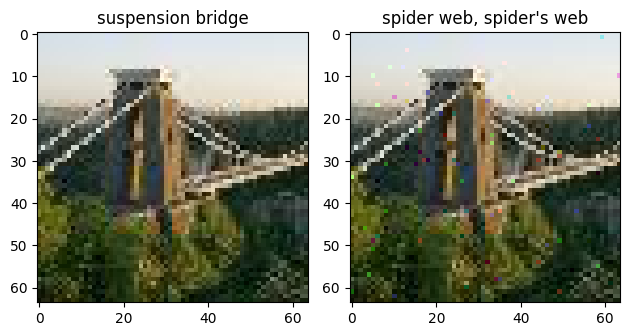

successful attack ratio: 1.0
105.0
attack on image 201


  1%|▏         | 126/10000 [00:03<04:22, 37.66it/s]


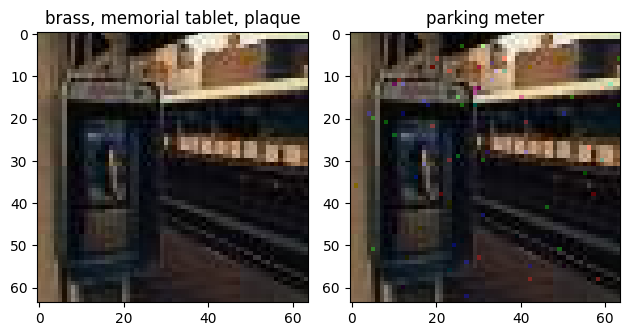

successful attack ratio: 1.0
115.5
attack on image 202


  1%|          | 115/10000 [00:03<05:38, 29.17it/s]


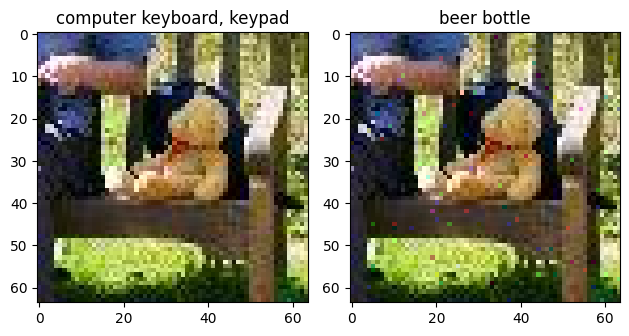

successful attack ratio: 1.0
115.33333333333333
attack on image 203


  1%|          | 54/10000 [00:01<03:36, 45.84it/s]


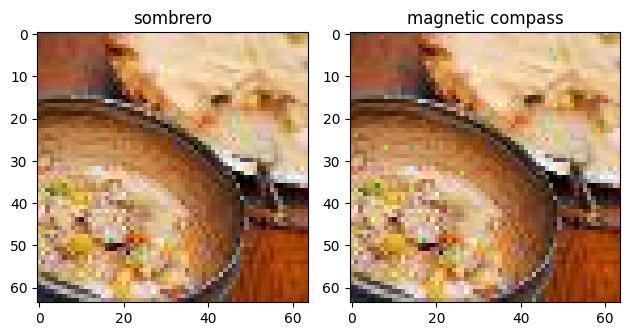

successful attack ratio: 1.0
100.0
attack on image 204


  1%|          | 109/10000 [00:02<03:35, 46.00it/s]


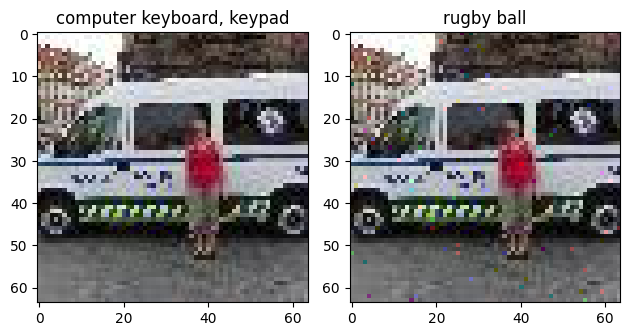

successful attack ratio: 1.0
101.8
attack on image 205


  1%|          | 78/10000 [00:01<03:45, 43.99it/s]


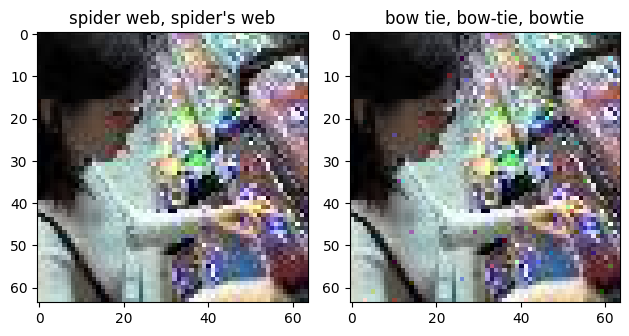

successful attack ratio: 1.0
97.83333333333333
attack on image 206


  1%|          | 52/10000 [00:01<03:32, 46.76it/s]


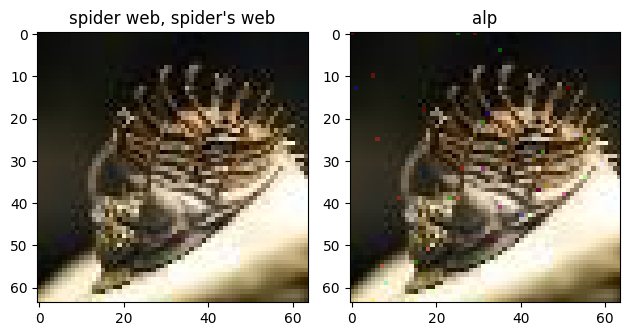

successful attack ratio: 1.0
91.28571428571429
attack on image 207


  6%|▋         | 625/10000 [00:15<03:51, 40.53it/s]


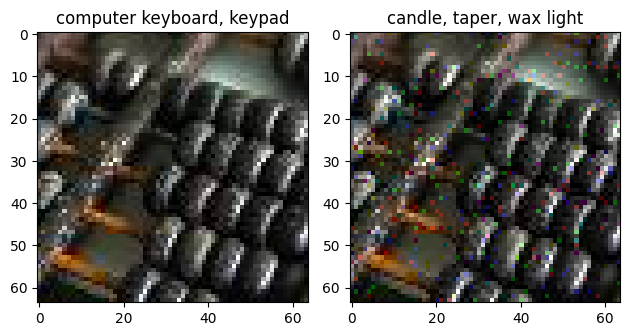

successful attack ratio: 1.0
158.0
attack on image 208


  1%|          | 122/10000 [00:03<05:04, 32.44it/s]


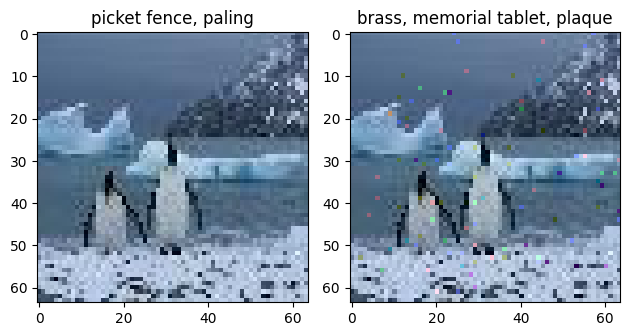

successful attack ratio: 1.0
154.0
attack on image 209


  0%|          | 31/10000 [00:00<03:40, 45.16it/s]


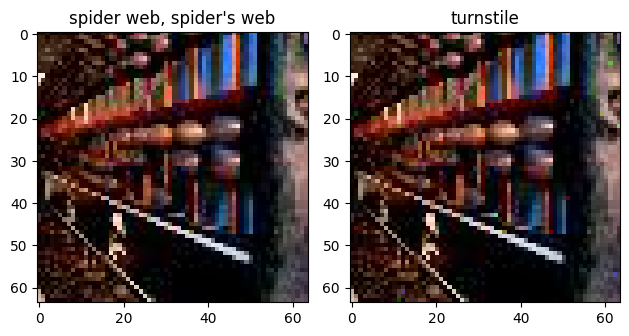

successful attack ratio: 1.0
141.7
attack on image 210


  1%|          | 111/10000 [00:02<03:43, 44.32it/s]


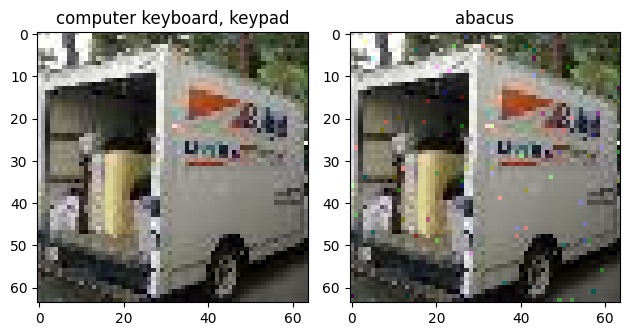

successful attack ratio: 1.0
138.9090909090909
attack on image 211


  0%|          | 36/10000 [00:00<03:32, 46.84it/s]


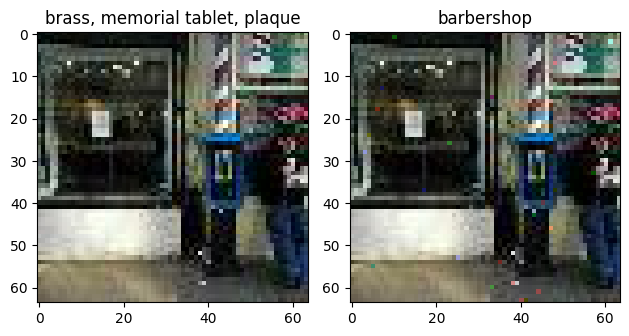

successful attack ratio: 1.0
130.33333333333334
attack on image 212


  1%|          | 83/10000 [00:01<03:37, 45.58it/s]


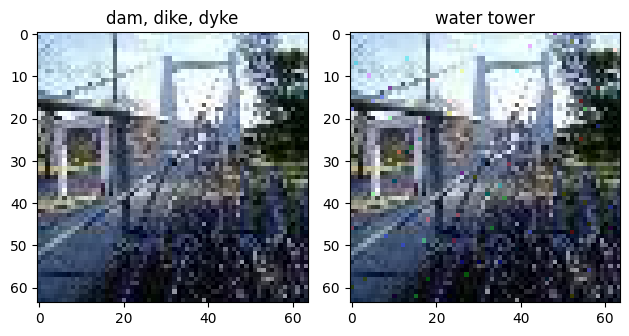

successful attack ratio: 1.0
126.6923076923077
attack on image 213


  2%|▏         | 236/10000 [00:06<04:32, 35.78it/s]


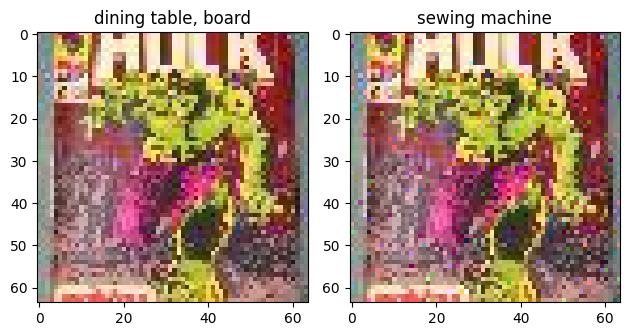

successful attack ratio: 1.0
134.5
attack on image 214


  1%|          | 101/10000 [00:02<04:03, 40.73it/s]


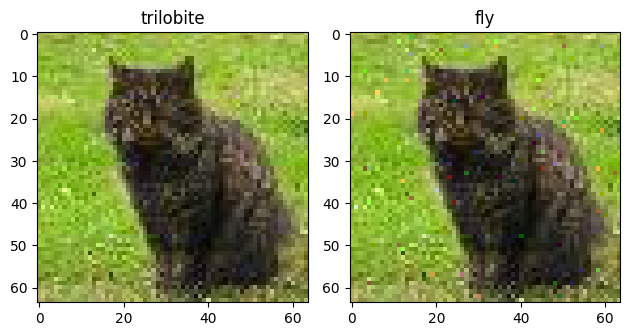

successful attack ratio: 1.0
132.26666666666668
attack on image 215


  0%|          | 42/10000 [00:01<04:20, 38.16it/s]


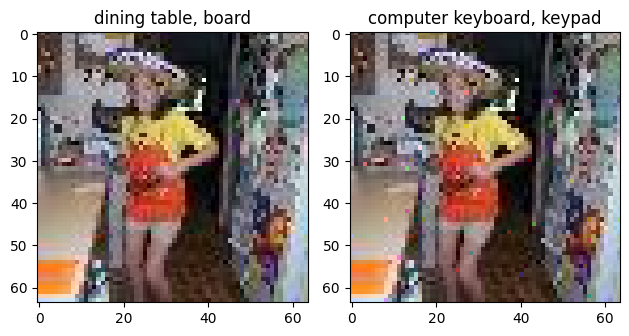

successful attack ratio: 1.0
126.625
attack on image 216


  1%|▏         | 140/10000 [00:03<04:33, 36.07it/s]


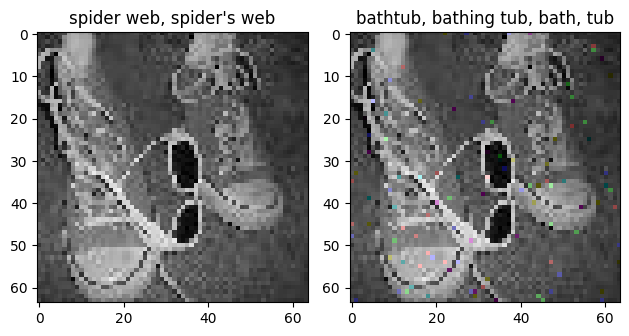

successful attack ratio: 1.0
127.41176470588235
attack on image 217


  1%|▏         | 147/10000 [00:04<05:07, 32.02it/s]


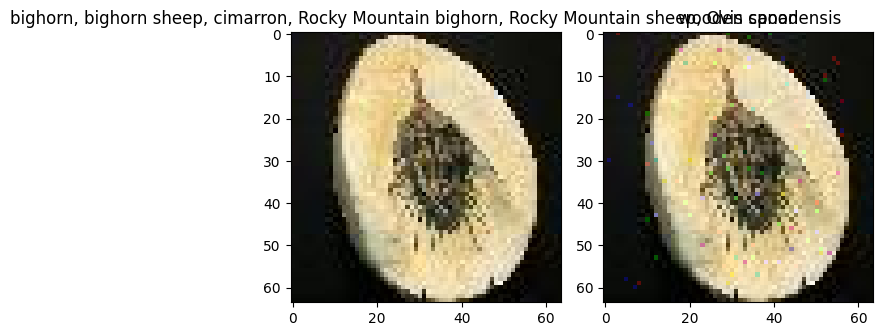

successful attack ratio: 1.0
128.5
attack on image 218


  2%|▏         | 155/10000 [00:03<03:37, 45.28it/s]


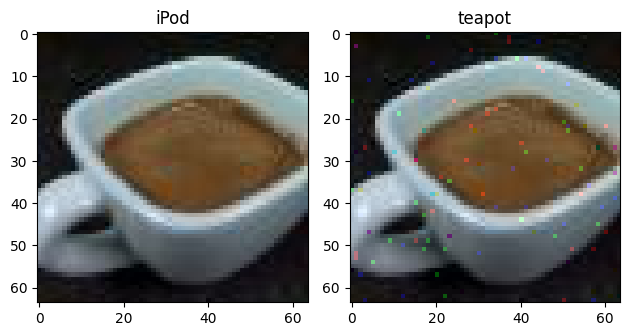

successful attack ratio: 1.0
129.89473684210526
attack on image 219


  3%|▎         | 307/10000 [00:08<04:17, 37.67it/s]


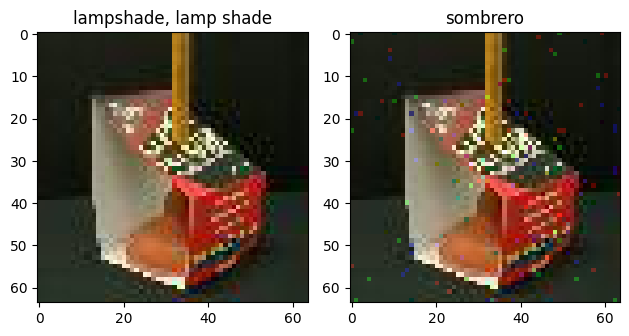

successful attack ratio: 1.0
138.75
attack on image 220


  1%|          | 54/10000 [00:01<04:48, 34.49it/s]


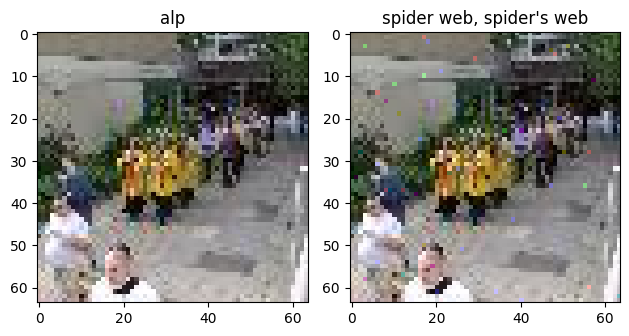

successful attack ratio: 1.0
134.71428571428572
attack on image 221


  4%|▎         | 350/10000 [00:08<03:46, 42.60it/s]


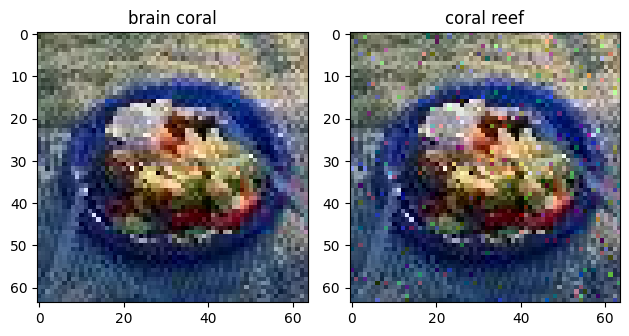

successful attack ratio: 1.0
144.5
attack on image 222


  1%|▏         | 129/10000 [00:04<05:12, 31.54it/s]


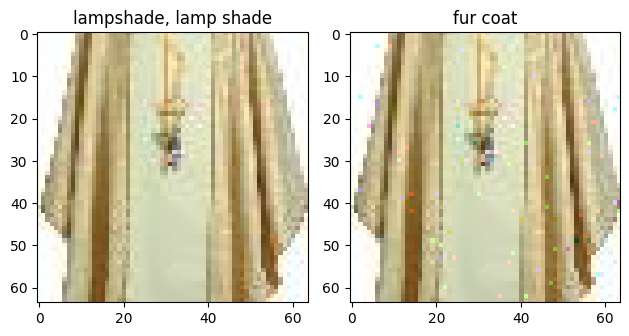

successful attack ratio: 1.0
143.82608695652175
attack on image 223


  0%|          | 30/10000 [00:00<04:03, 40.96it/s]


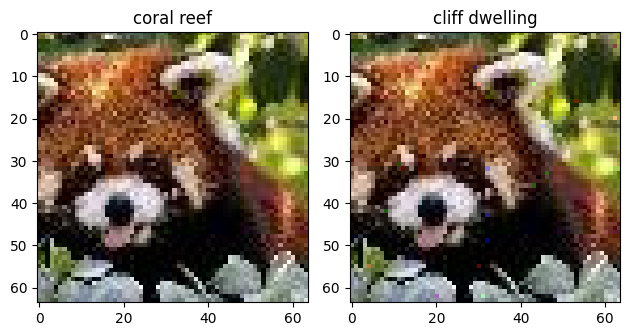

successful attack ratio: 1.0
139.08333333333334
attack on image 224


  0%|          | 46/10000 [00:01<03:52, 42.83it/s]


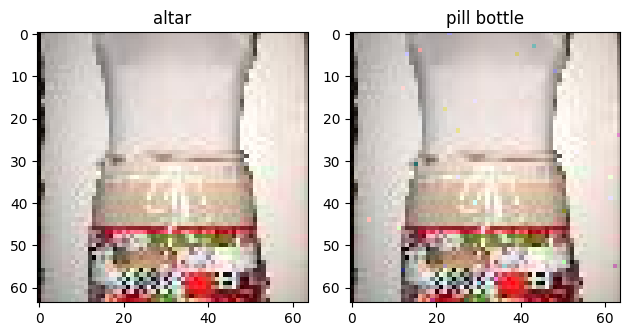

successful attack ratio: 1.0
135.36
attack on image 225


  0%|          | 40/10000 [00:00<03:47, 43.87it/s]


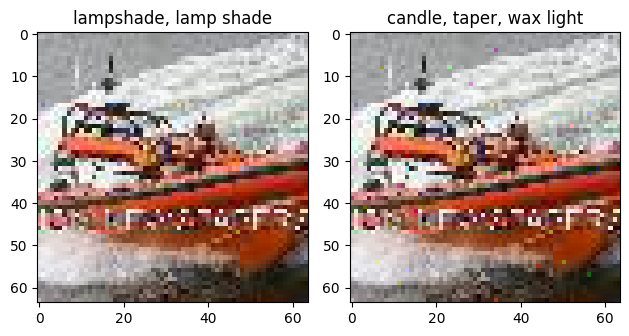

successful attack ratio: 1.0
131.69230769230768
attack on image 226


  3%|▎         | 254/10000 [00:06<04:03, 40.06it/s]


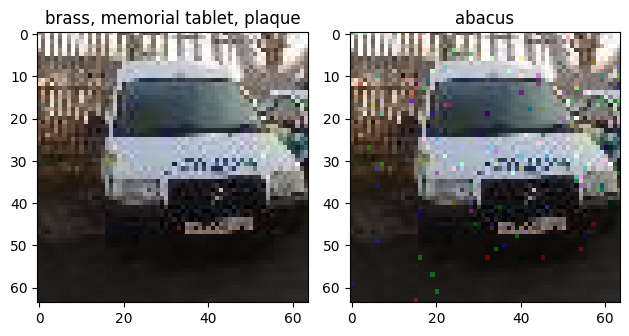

successful attack ratio: 1.0
136.22222222222223
attack on image 227


  1%|▏         | 137/10000 [00:04<05:03, 32.53it/s]


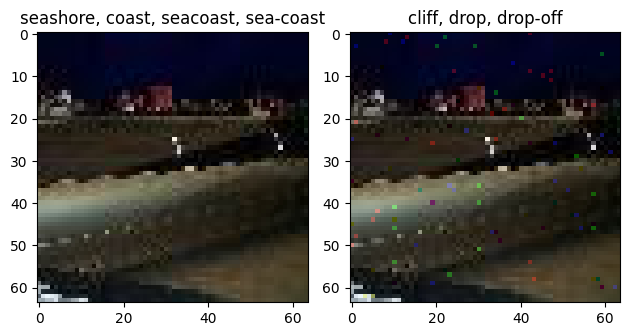

successful attack ratio: 1.0
136.25
attack on image 228


  1%|▏         | 140/10000 [00:03<03:50, 42.86it/s]


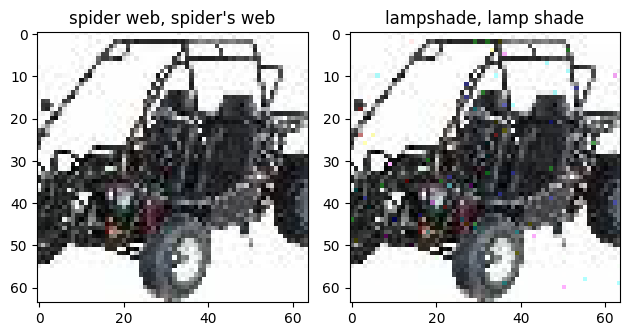

successful attack ratio: 1.0
136.3793103448276
attack on image 229


  1%|          | 65/10000 [00:01<03:56, 42.07it/s]


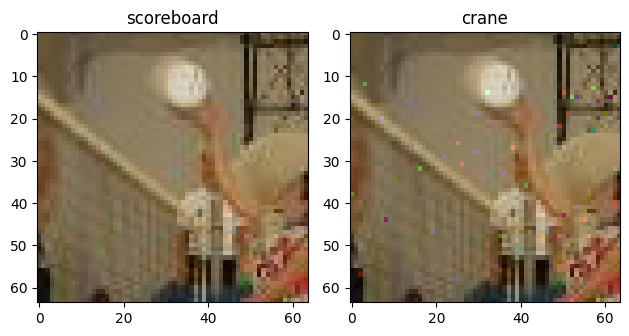

successful attack ratio: 1.0
134.0
attack on image 230


  1%|          | 90/10000 [00:02<03:53, 42.39it/s]


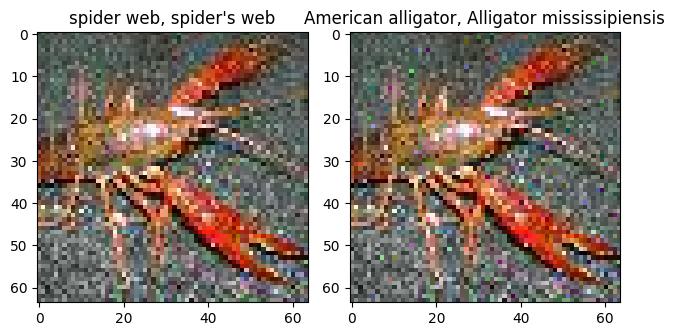

successful attack ratio: 1.0
132.58064516129033
attack on image 231


  3%|▎         | 282/10000 [00:09<05:39, 28.61it/s]


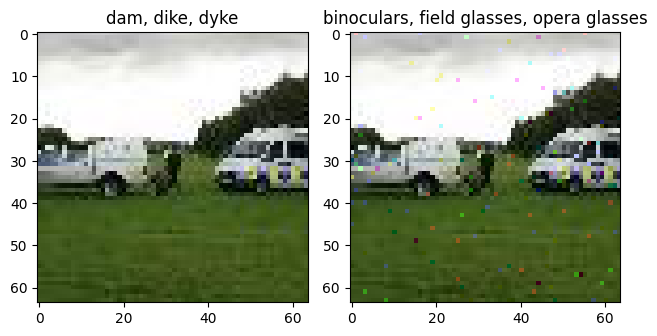

successful attack ratio: 1.0
137.25
attack on image 232


  1%|          | 112/10000 [00:02<03:41, 44.63it/s]


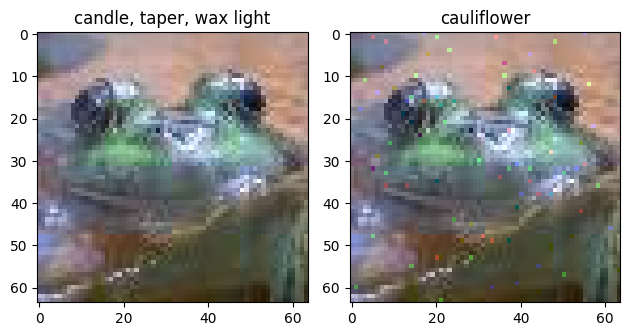

successful attack ratio: 1.0
136.4848484848485
attack on image 233


  2%|▏         | 224/10000 [00:06<04:35, 35.52it/s]


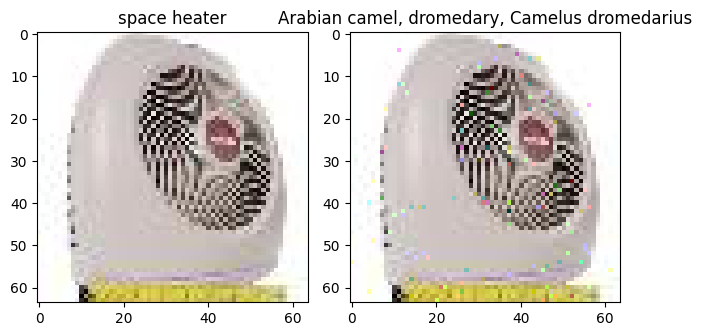

successful attack ratio: 1.0
139.05882352941177
attack on image 234


  1%|          | 55/10000 [00:01<04:25, 37.49it/s]


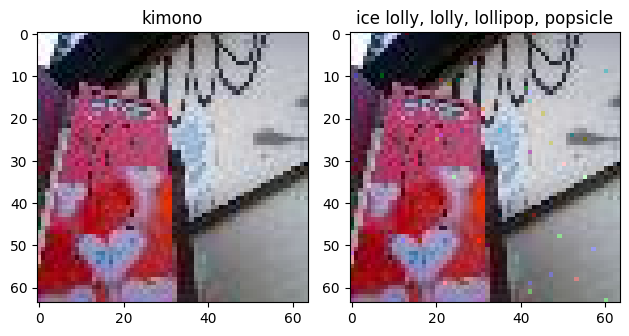

successful attack ratio: 1.0
136.65714285714284
attack on image 235


  2%|▏         | 177/10000 [00:04<03:49, 42.81it/s]


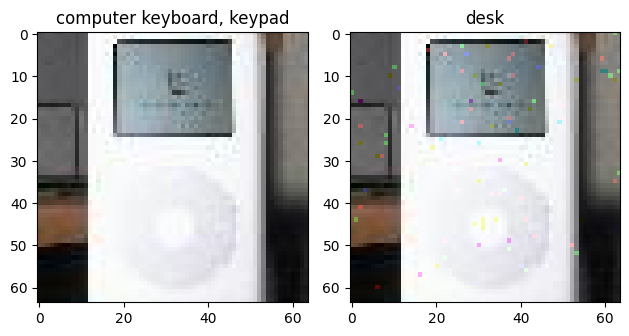

successful attack ratio: 1.0
137.77777777777777
attack on image 236


  1%|          | 58/10000 [00:01<03:54, 42.37it/s]


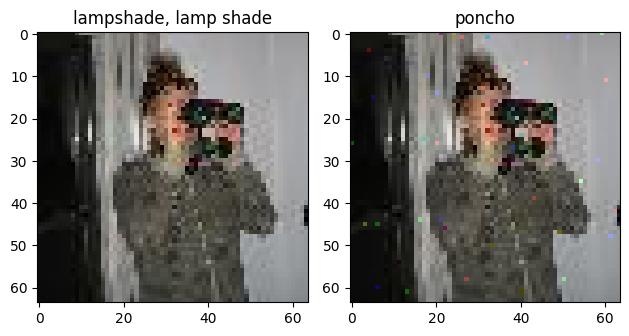

successful attack ratio: 1.0
135.6216216216216
attack on image 237


  0%|          | 41/10000 [00:01<04:10, 39.72it/s]


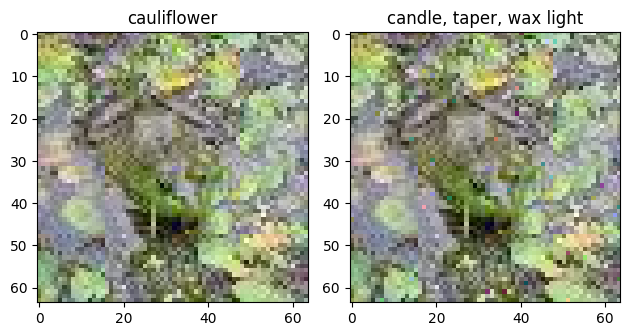

successful attack ratio: 1.0
133.1315789473684
attack on image 238


  1%|          | 66/10000 [00:01<05:00, 33.02it/s]


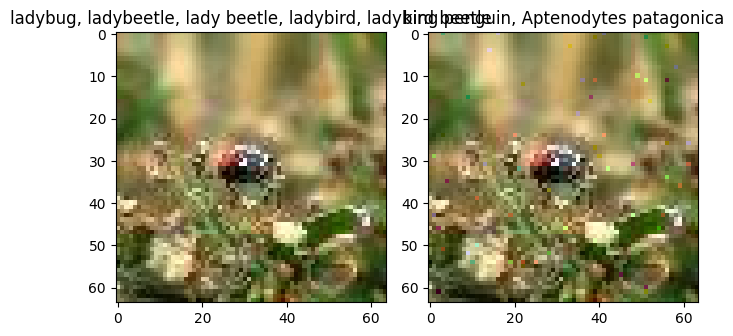

successful attack ratio: 1.0
131.4102564102564
attack on image 239


  1%|          | 107/10000 [00:03<05:07, 32.14it/s]


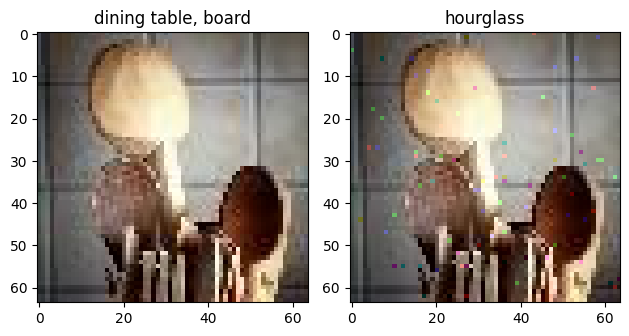

successful attack ratio: 1.0
130.8
attack on image 240


  1%|▏         | 149/10000 [00:03<03:41, 44.55it/s]


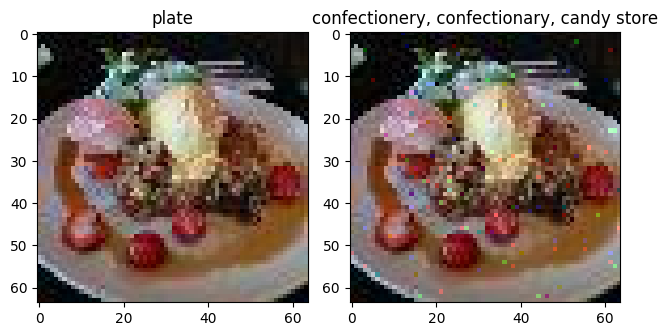

successful attack ratio: 1.0
131.2439024390244
attack on image 241


  0%|          | 29/10000 [00:00<03:43, 44.61it/s]


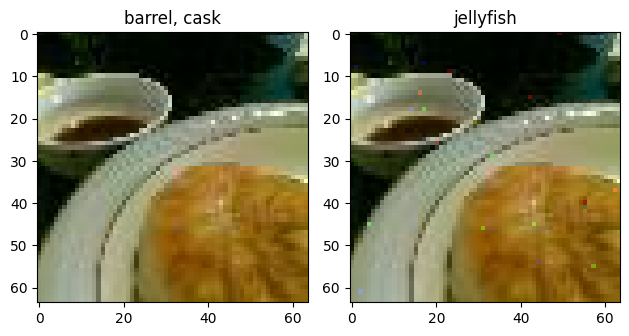

successful attack ratio: 1.0
128.8095238095238
attack on image 242


  1%|          | 74/10000 [00:01<03:54, 42.41it/s]


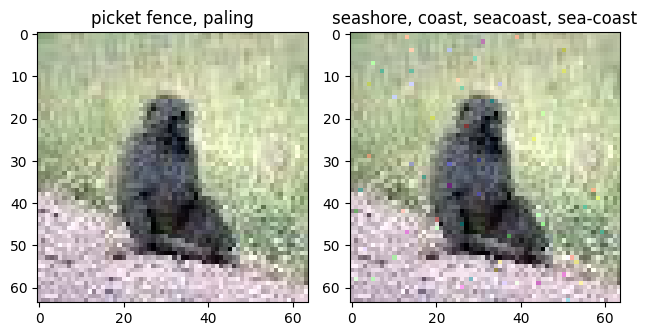

successful attack ratio: 1.0
127.53488372093024
attack on image 243


  0%|          | 23/10000 [00:00<04:22, 38.02it/s]


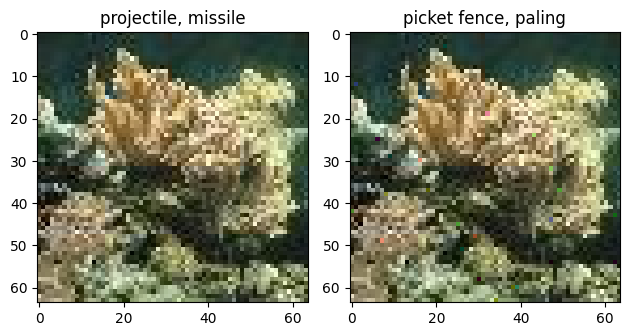

successful attack ratio: 1.0
125.1590909090909
attack on image 244


  0%|          | 47/10000 [00:01<04:28, 37.11it/s]


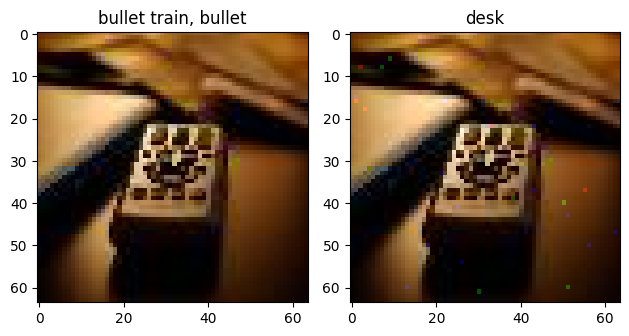

successful attack ratio: 1.0
123.42222222222222
attack on image 245


  0%|          | 29/10000 [00:01<05:45, 28.90it/s]


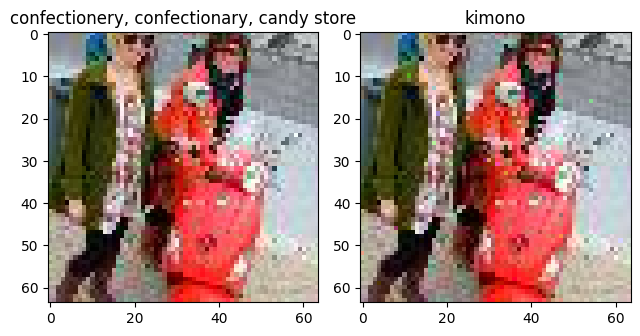

successful attack ratio: 1.0
121.3695652173913
attack on image 246


  1%|          | 103/10000 [00:02<04:42, 35.03it/s]


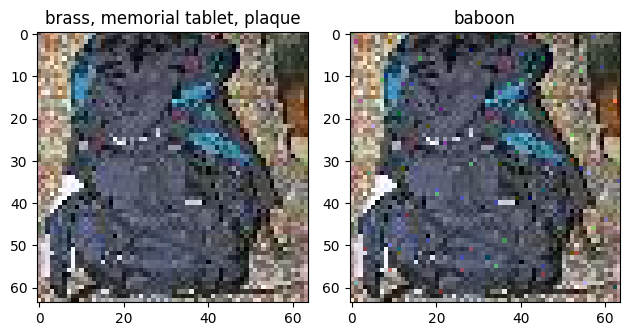

successful attack ratio: 1.0
120.97872340425532
attack on image 247


  0%|          | 32/10000 [00:00<03:51, 42.98it/s]


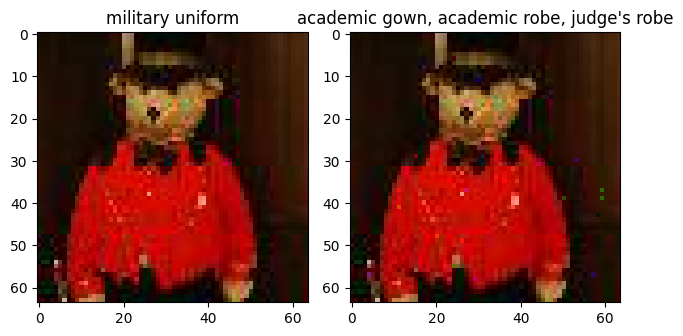

successful attack ratio: 1.0
119.125
attack on image 248


  0%|          | 44/10000 [00:01<04:20, 38.16it/s]


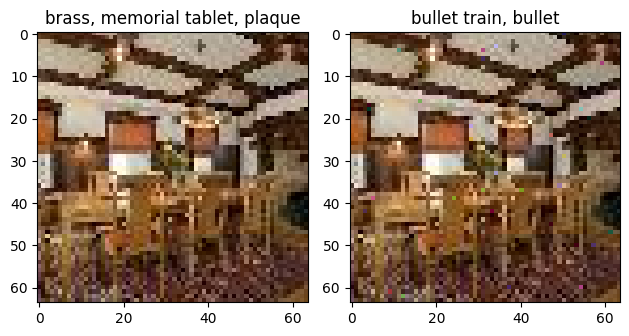

successful attack ratio: 1.0
117.59183673469387
attack on image 249


  5%|▌         | 544/10000 [00:15<04:30, 34.99it/s]


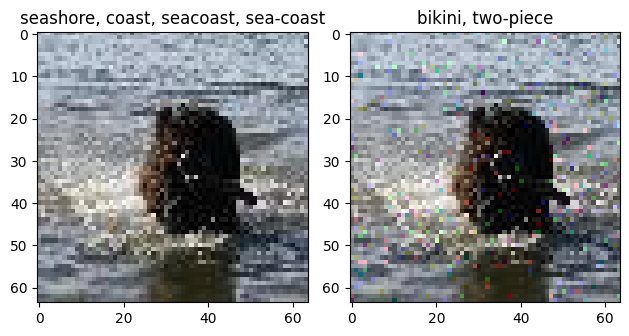

successful attack ratio: 1.0
126.12
attack on image 250


  1%|          | 69/10000 [00:01<04:08, 39.97it/s]


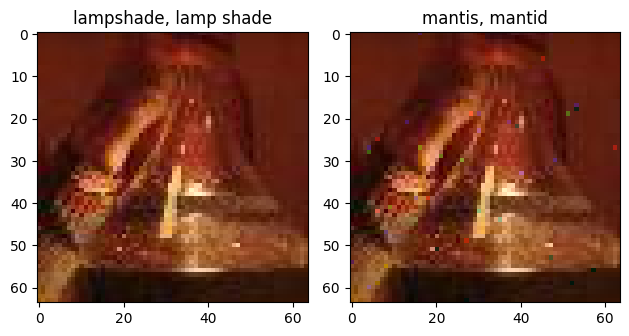

successful attack ratio: 1.0
125.0
attack on image 251


  1%|          | 68/10000 [00:01<03:59, 41.42it/s]


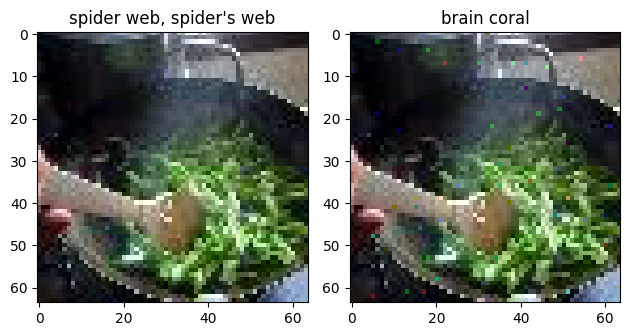

successful attack ratio: 1.0
123.90384615384616
attack on image 252


  1%|          | 86/10000 [00:02<05:22, 30.71it/s]


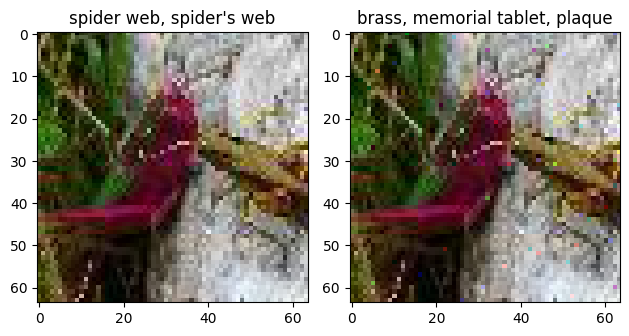

successful attack ratio: 1.0
123.18867924528301
attack on image 253


  0%|          | 18/10000 [00:00<06:35, 25.24it/s]


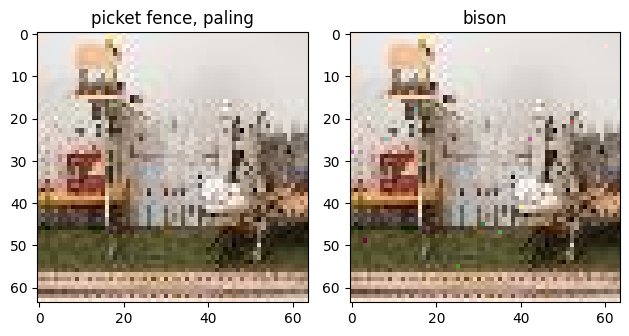

successful attack ratio: 1.0
121.24074074074075
attack on image 254


  1%|▏         | 133/10000 [00:03<04:31, 36.30it/s]


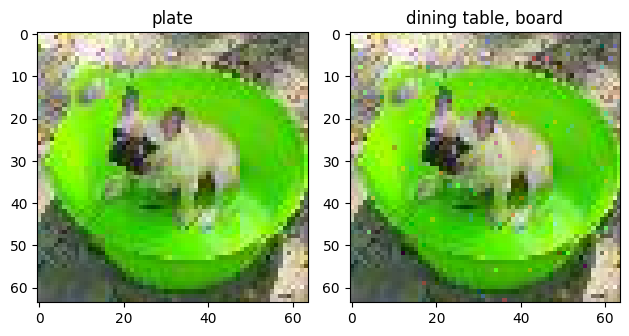

successful attack ratio: 1.0
121.45454545454545
attack on image 255


  1%|          | 51/10000 [00:01<03:46, 43.90it/s]


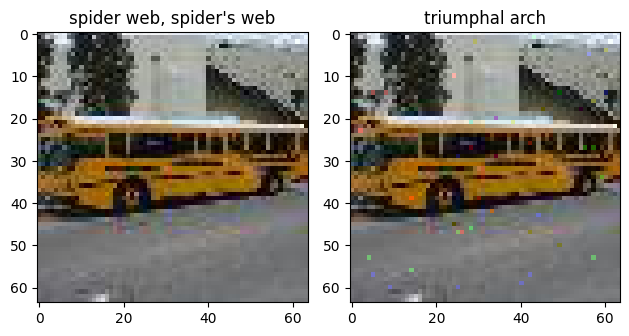

successful attack ratio: 1.0
120.19642857142857
attack on image 256


  1%|          | 99/10000 [00:02<03:58, 41.55it/s]


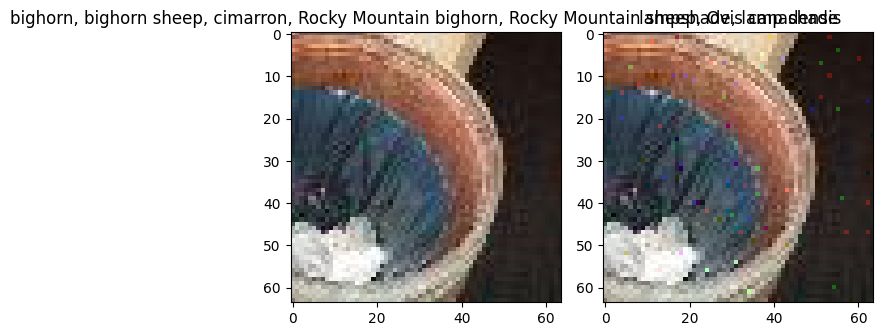

successful attack ratio: 1.0
119.82456140350877
attack on image 257


  1%|          | 110/10000 [00:02<04:27, 37.00it/s]


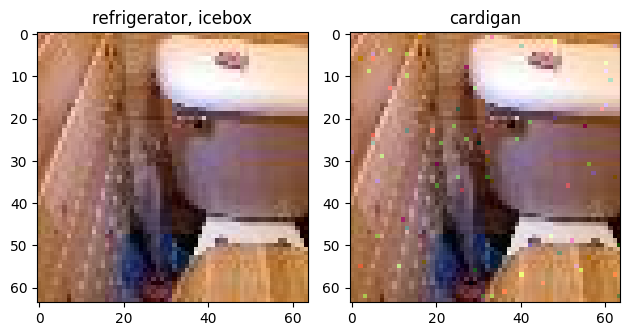

successful attack ratio: 1.0
119.65517241379311
attack on image 258


  4%|▍         | 376/10000 [00:11<04:51, 33.05it/s]


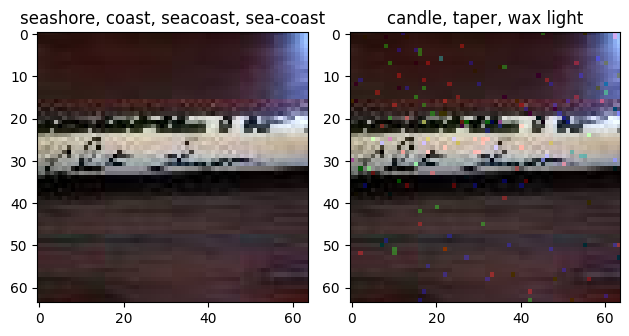

successful attack ratio: 1.0
124.0
attack on image 259


  1%|          | 58/10000 [00:01<03:54, 42.43it/s]


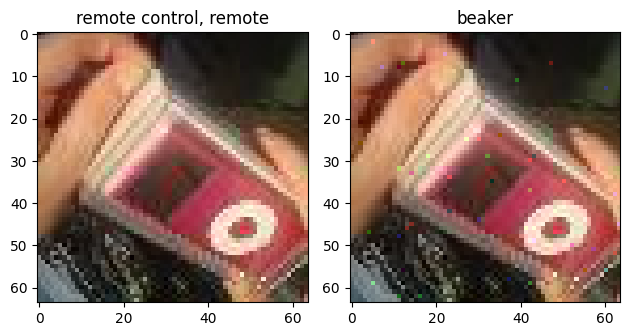

successful attack ratio: 1.0
122.9
attack on image 260


  2%|▏         | 206/10000 [00:06<05:29, 29.77it/s]


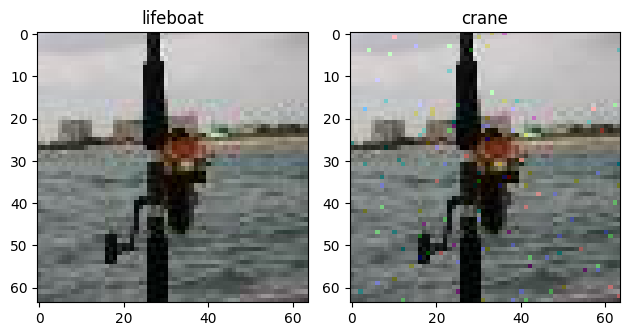

successful attack ratio: 1.0
124.26229508196721
attack on image 261


  0%|          | 37/10000 [00:00<04:12, 39.41it/s]


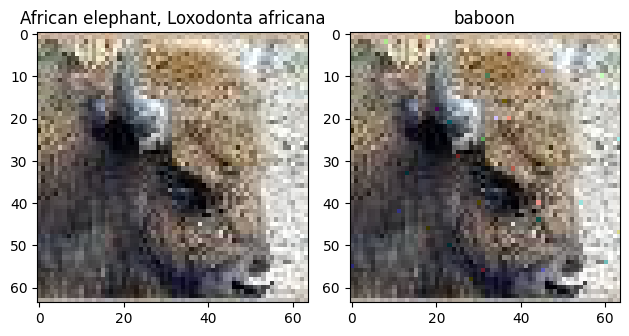

successful attack ratio: 1.0
122.85483870967742
attack on image 262


  1%|          | 99/10000 [00:02<03:40, 44.97it/s]


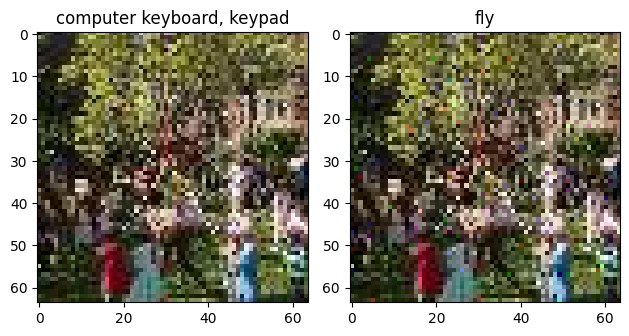

successful attack ratio: 1.0
122.47619047619048
attack on image 263


  2%|▏         | 208/10000 [00:05<04:27, 36.63it/s]


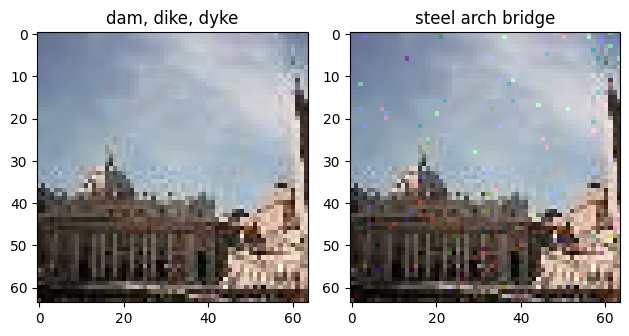

successful attack ratio: 1.0
123.8125
attack on image 264


  1%|          | 65/10000 [00:02<05:48, 28.55it/s]


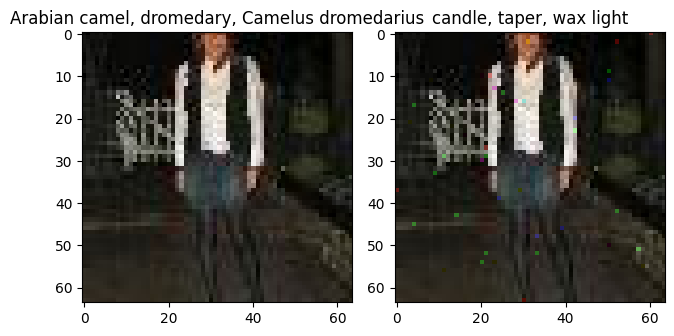

successful attack ratio: 1.0
122.9076923076923
attack on image 265


  0%|          | 19/10000 [00:00<05:20, 31.12it/s]


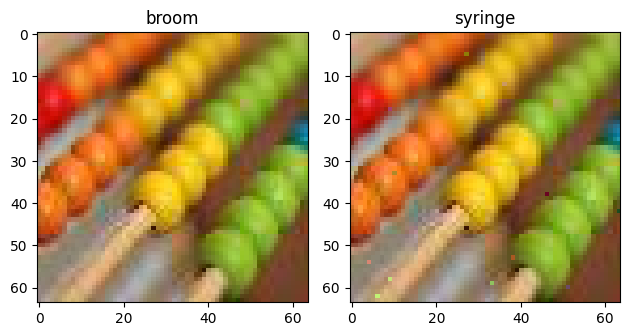

successful attack ratio: 1.0
121.33333333333333
attack on image 266


  2%|▏         | 151/10000 [00:03<03:55, 41.77it/s]


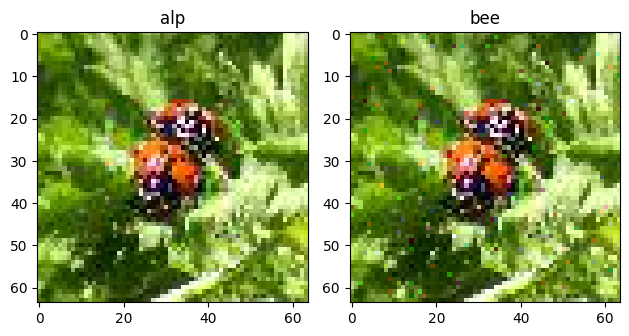

successful attack ratio: 1.0
121.77611940298507
attack on image 267


  1%|▏         | 146/10000 [00:03<04:24, 37.22it/s]


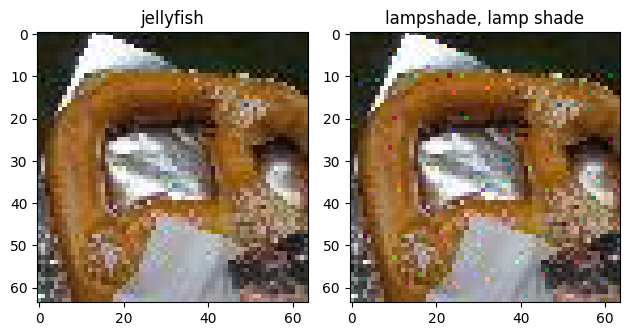

successful attack ratio: 1.0
122.13235294117646
attack on image 268


  2%|▏         | 179/10000 [00:06<05:32, 29.55it/s]


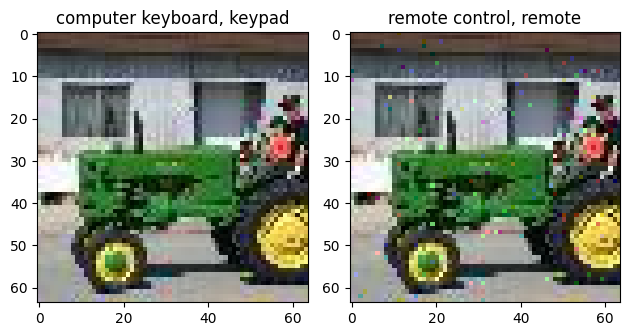

successful attack ratio: 1.0
122.95652173913044
attack on image 269


  1%|          | 64/10000 [00:01<04:09, 39.78it/s]


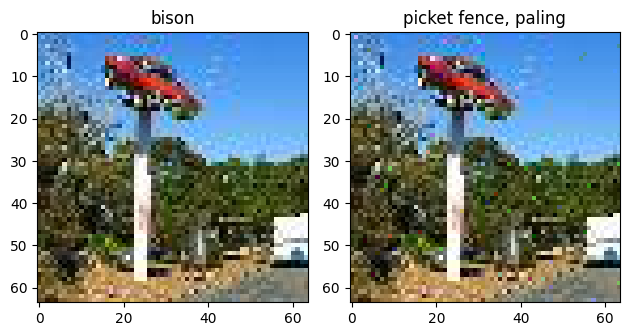

successful attack ratio: 1.0
122.11428571428571
attack on image 270


  1%|          | 108/10000 [00:02<04:16, 38.55it/s]


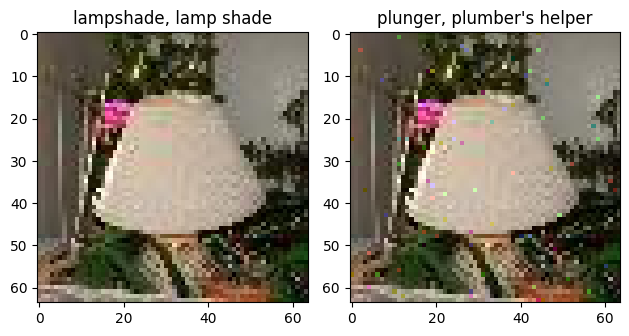

successful attack ratio: 1.0
121.91549295774648
attack on image 271


  1%|          | 57/10000 [00:01<04:16, 38.78it/s]


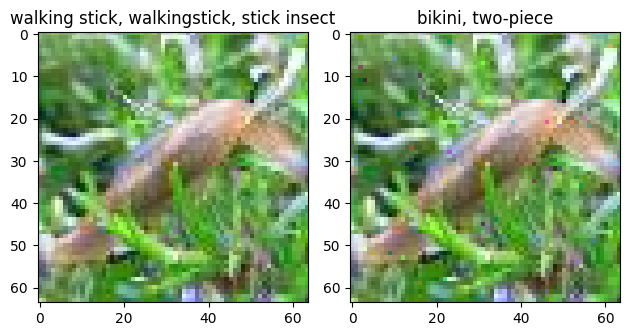

successful attack ratio: 1.0
121.01388888888889
attack on image 272


  1%|          | 119/10000 [00:03<04:11, 39.22it/s]


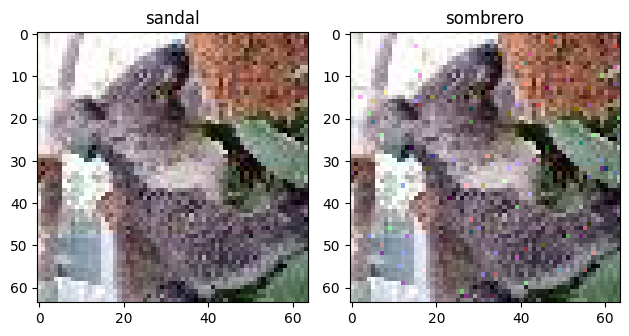

successful attack ratio: 1.0
120.98630136986301
attack on image 273


  1%|          | 60/10000 [00:02<05:34, 29.71it/s]


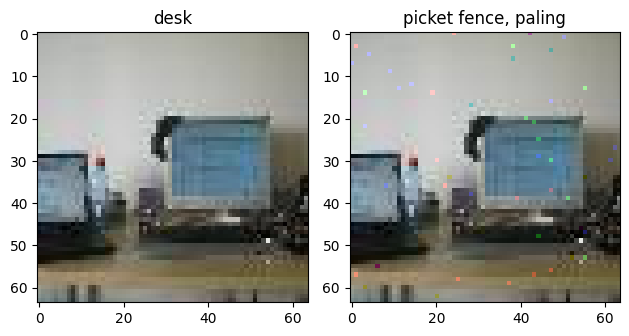

successful attack ratio: 1.0
120.16216216216216
attack on image 274


  0%|          | 37/10000 [00:01<06:02, 27.47it/s]


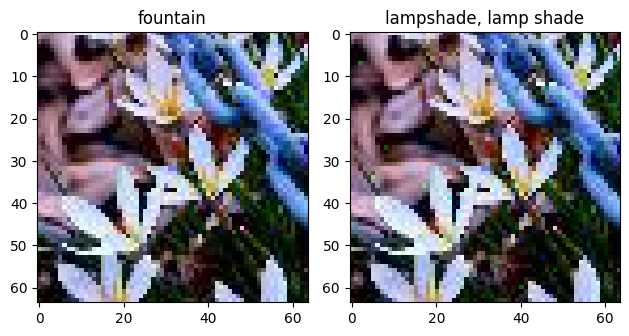

successful attack ratio: 1.0
119.05333333333333
attack on image 275


  1%|          | 111/10000 [00:03<05:42, 28.85it/s]


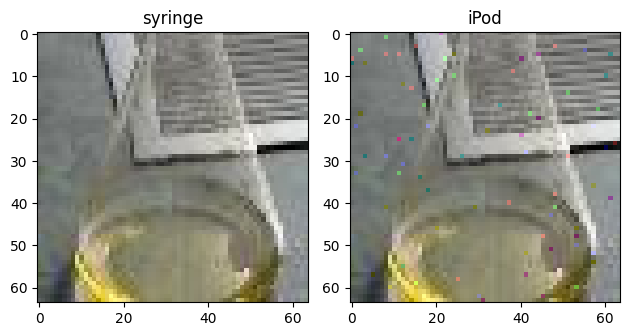

successful attack ratio: 1.0
118.94736842105263
attack on image 276


  0%|          | 39/10000 [00:01<05:06, 32.50it/s]


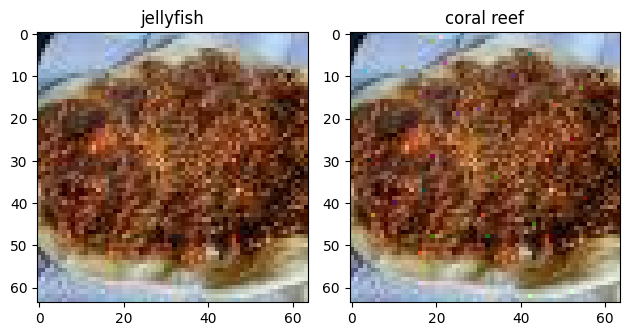

successful attack ratio: 1.0
117.9090909090909
attack on image 277


  1%|          | 55/10000 [00:01<04:21, 38.05it/s]


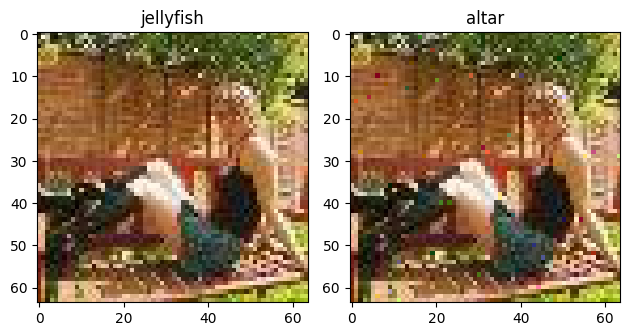

successful attack ratio: 1.0
117.1025641025641
attack on image 278


  1%|▏         | 148/10000 [00:03<04:03, 40.53it/s]


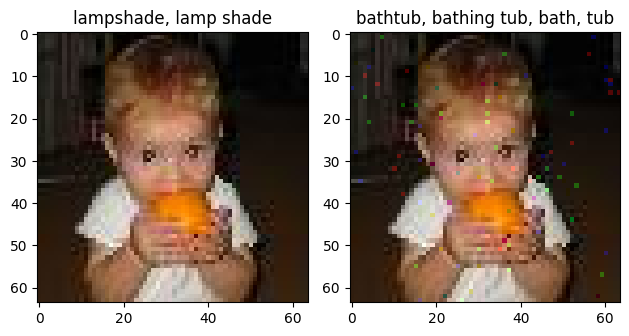

successful attack ratio: 1.0
117.49367088607595
attack on image 279


  1%|          | 60/10000 [00:01<04:24, 37.62it/s]


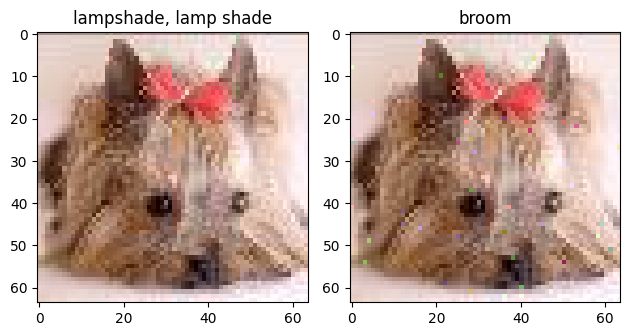

successful attack ratio: 1.0
116.775
attack on image 280


  1%|          | 88/10000 [00:02<05:22, 30.78it/s]


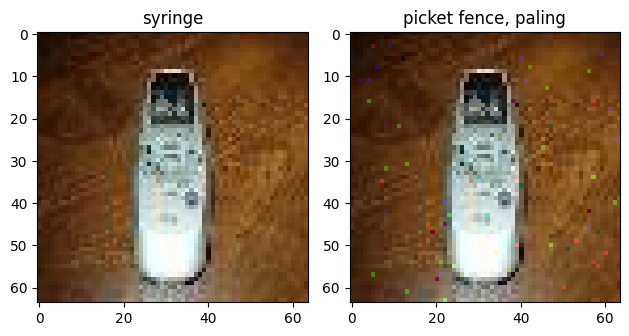

successful attack ratio: 1.0
116.41975308641975
attack on image 281


  1%|          | 71/10000 [00:02<05:34, 29.68it/s]


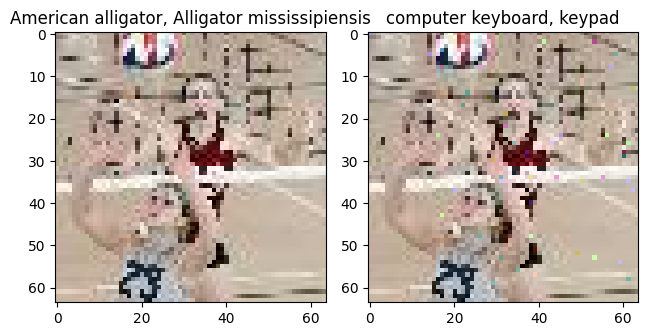

successful attack ratio: 1.0
115.86585365853658
attack on image 282


  1%|          | 78/10000 [00:01<03:58, 41.53it/s]


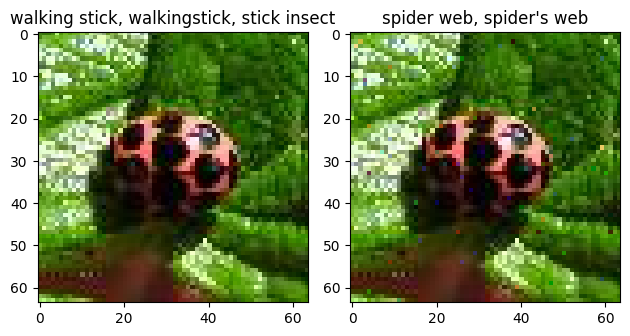

successful attack ratio: 1.0
115.40963855421687
attack on image 283


  3%|▎         | 269/10000 [00:07<04:19, 37.44it/s]


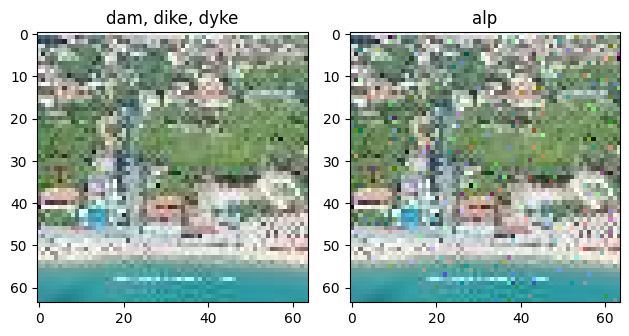

successful attack ratio: 1.0
117.23809523809524
attack on image 284


  1%|          | 77/10000 [00:02<06:02, 27.39it/s]


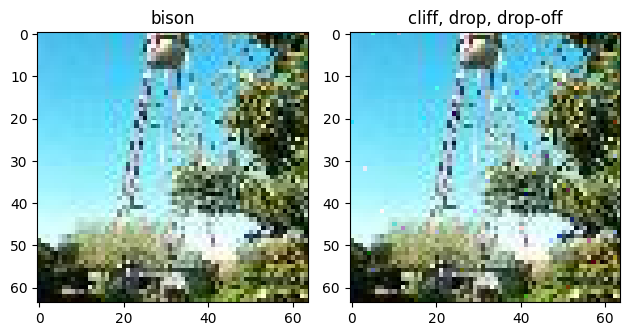

successful attack ratio: 1.0
116.76470588235294
attack on image 285


  0%|          | 44/10000 [00:01<05:44, 28.89it/s]


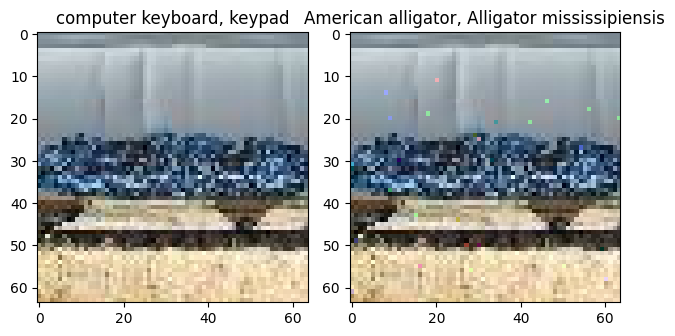

successful attack ratio: 1.0
115.9186046511628
attack on image 286


  1%|          | 89/10000 [00:02<04:21, 37.84it/s]


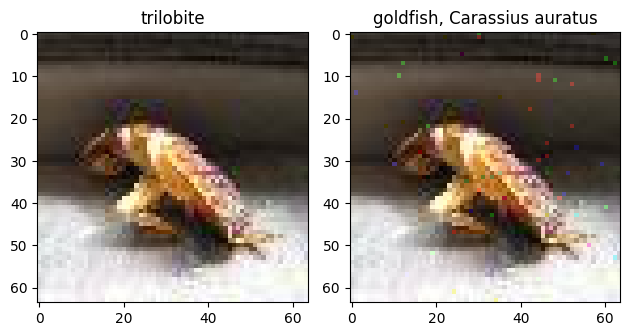

successful attack ratio: 1.0
115.60919540229885
attack on image 287


  1%|▏         | 128/10000 [00:03<04:34, 36.01it/s]


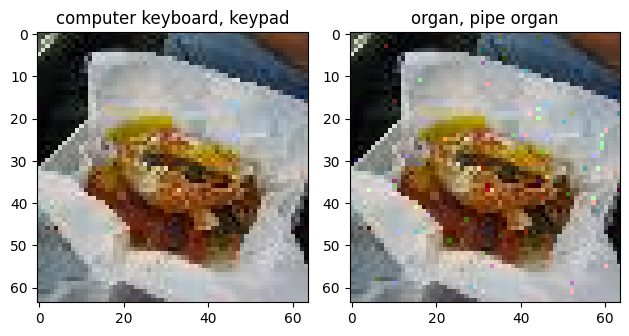

successful attack ratio: 1.0
115.75
attack on image 288


  1%|          | 119/10000 [00:03<05:14, 31.44it/s]


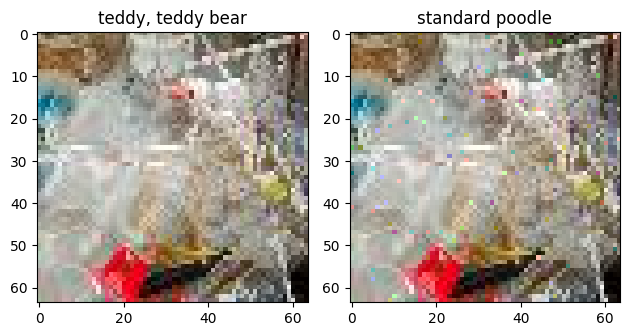

successful attack ratio: 1.0
115.78651685393258
attack on image 289


  0%|          | 43/10000 [00:01<05:56, 27.89it/s]


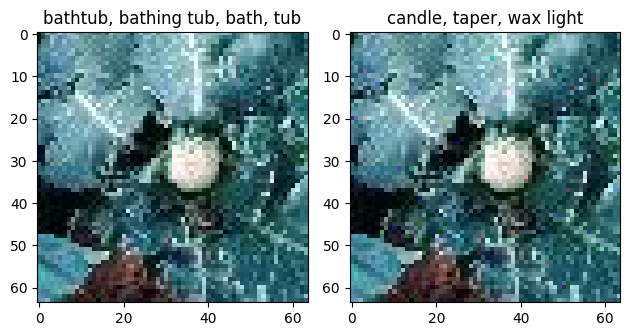

successful attack ratio: 1.0
114.97777777777777
attack on image 290


  1%|          | 65/10000 [00:01<04:58, 33.25it/s]


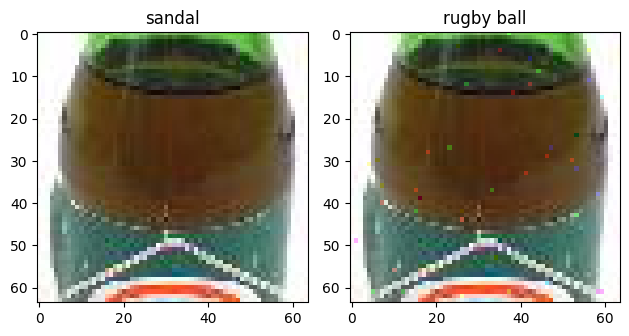

successful attack ratio: 1.0
114.42857142857143
attack on image 291


  1%|          | 78/10000 [00:02<04:34, 36.14it/s]


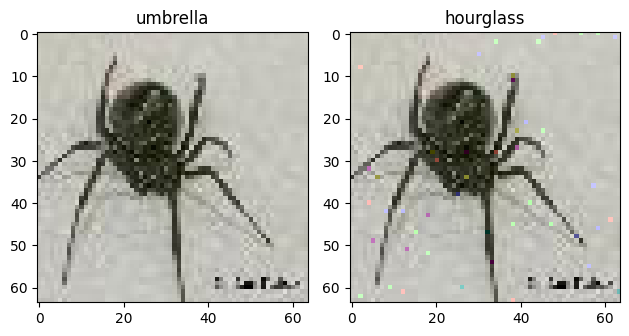

successful attack ratio: 1.0
114.03260869565217
attack on image 292


  1%|          | 83/10000 [00:01<03:54, 42.28it/s]


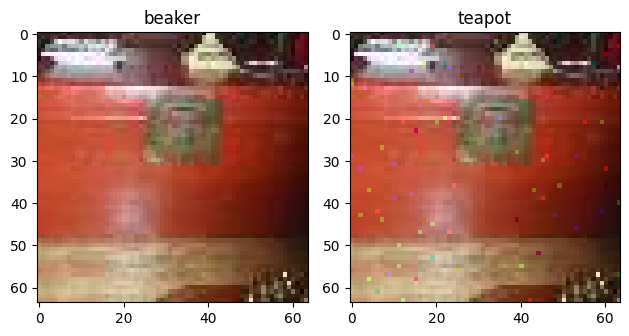

successful attack ratio: 1.0
113.6989247311828
attack on image 293


  2%|▏         | 174/10000 [00:05<04:45, 34.38it/s]


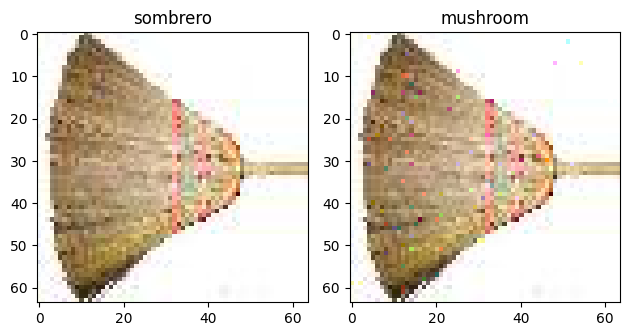

successful attack ratio: 1.0
114.34042553191489
attack on image 294


  1%|          | 111/10000 [00:04<06:00, 27.40it/s]


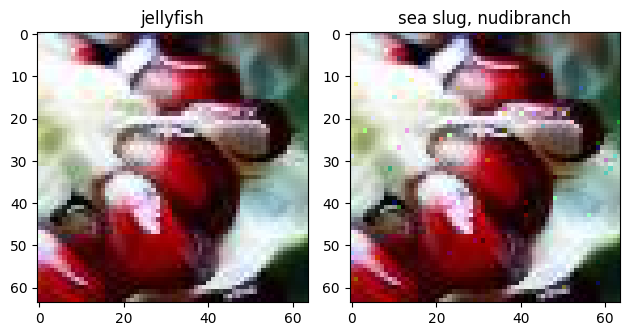

successful attack ratio: 1.0
114.30526315789474
attack on image 295


  1%|          | 88/10000 [00:02<04:05, 40.30it/s]


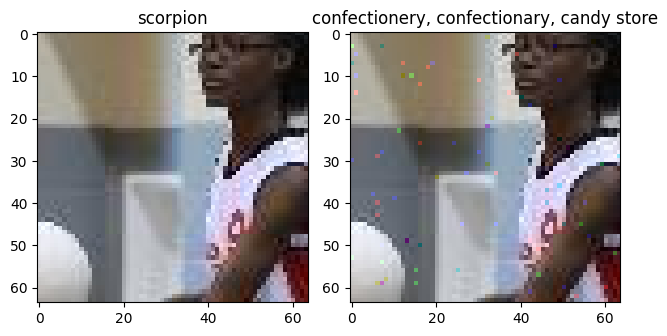

successful attack ratio: 1.0
114.03125
attack on image 296


  1%|          | 104/10000 [00:02<04:21, 37.90it/s]


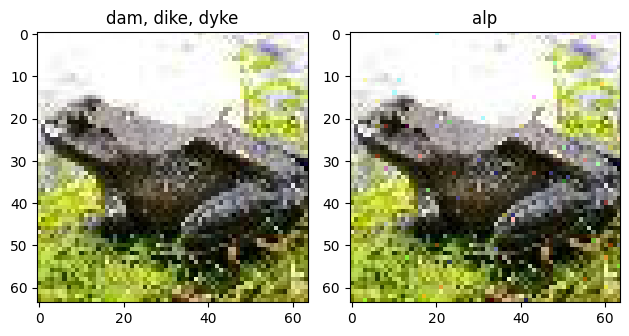

successful attack ratio: 1.0
113.9278350515464
attack on image 297


  0%|          | 46/10000 [00:01<04:01, 41.22it/s]


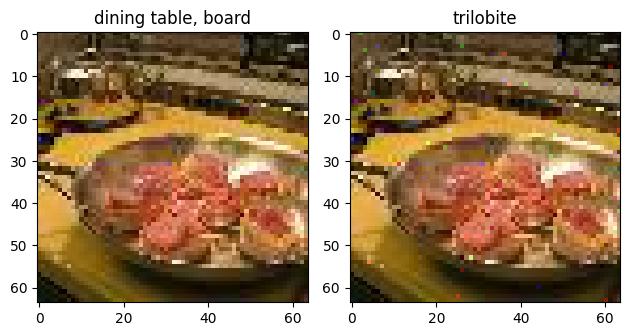

successful attack ratio: 1.0
113.23469387755102
attack on image 298


  2%|▏         | 242/10000 [00:07<05:08, 31.64it/s]


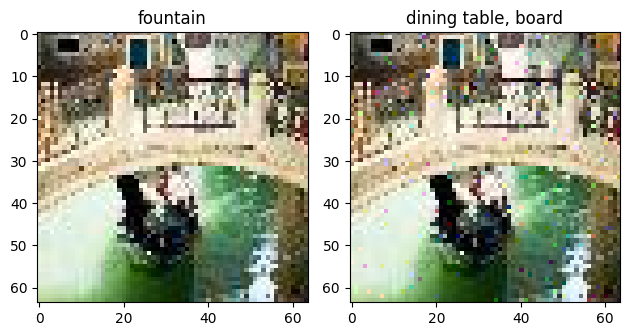

successful attack ratio: 1.0
114.53535353535354
attack on image 299


  1%|          | 81/10000 [00:02<04:51, 34.02it/s]


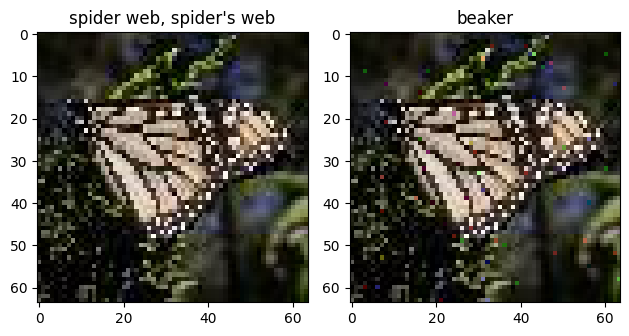

successful attack ratio: 1.0
114.2


In [ ]:
attacker = Simba('mobilenet_v2')
arr = []
img_data = []
for i in range(200,300):
  print('attack on image',i)
  img, k = attacker.getAttackIteration(testset[idx[i]])
  x,y = testset[idx[i]]
  if k != 9999:
    arr.append(k)
    img_data.append([x,img])

    fig,a =  plt.subplots(1,2)

    res = attacker.model(x.unsqueeze(0))
    res = torch.squeeze(res)
    res = res[mapping]
    actual_class = int(torch.argmax(res))
    a[0].set_title(str(labels[mapping[actual_class]]))
    a[0].imshow(np.transpose(x,(1,2,0)))

    res = attacker.model(img.unsqueeze(0))
    res = torch.squeeze(res)
    res = res[mapping]
    actual_class = int(torch.argmax(res))
    a[1].set_title(str(labels[mapping[actual_class]]))
    a[1].imshow(np.transpose(img,(1,2,0)))
    plt.tight_layout()
    plt.show()
    print('successful attack ratio:',len(arr)/(i-199))
    print(np.average(arr))
    pickle.dump(img_data,open('img_data_4_300','wb'))
    pickle.dump(arr,open('arr_4_300','wb'))
    pickle.dump(i,open('i_4_300','wb'))